# Task 1

## Date: 26 May 2024

### Name: Jessica Bawden

### Email: jessbawden987@gmail.com

## Task 1: YouTube Streamer Analysis

### Dataset: Top 1000 YouTuber Statistics

Description: This dataset contains valuableinformation about the top YouTube streamers,including their ranking, categories, subscribers,country, visits, likes, comments, and more.Your task is to perform a comprehensiveanalysis of the dataset to extract insightsabout the top YouTube content creators.

## Import Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [138]:
df = pd.read_csv(r"C:\Users\jessb\Downloads\youtubers_df.csv")

### 1) Exploring data

In [139]:
print(df.head())

   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [140]:
df.info() # Getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


#### Check for misssing data

In [141]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [142]:
df['Categories'].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

In [143]:
# Handle the missing data
df.fillna('Desconocida', inplace=True) #Desconocide means unknown in Spanish
#Check the output
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [144]:
# Correting the column name 'Suscribers' to 'Subsribers'
df.rename(columns={'Suscribers':'Subscribers'},inplace=True)
df.columns #Checking columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [145]:
#Checking for duplicates
df.duplicated().sum()

0

#### Observation from the information gained about the dataset:

The DataFrame provided contains data about YouTubers. Here are some initial observations:

1. Entries: There are 1000 entries (rows) numbered from 0 to 999.
2. Columns: The dataset consists of 9 columns with the following information:
- Rank: Rank of the YouTuber with no missing values.
- Username: Username of the YouTuber with no missing values.
- Categories: Categories of the YouTuber with 306 missing values replaced with "unknown".
- Subscribers: Number of subscribers of the YouTuber with no missing values.
- Country: Country of the YouTuber with no missing values.
- Visits: Number of visits to the YouTuber's channel with no missing values.
- Likes: Number of likes of the YouTuber with no missing values.
- Comments: Number of comments of the YouTuber with no missing values.
- Links: YouTube link of the YouTuber.

In [146]:
# First 10 in the dataset
df.head(10)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Desconocida,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [147]:
# Summary statistics for the numeric columns in the dataset
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [148]:
# Displaying the summary stats for the object columns in the dataset
df.describe(include="object")

,Username,Categories,Country,Links
count,1000,1000,1000,1000
unique,994,46,29,994
top,NickyJamTV,Desconocida,Estados Unidos,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,2,306,293,2


### 2) Trend Analysis

In [149]:
# Most popular categories
most_popular_categories = df['Categories'].value_counts()
most_popular_categories

Categories
Desconocida                           306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

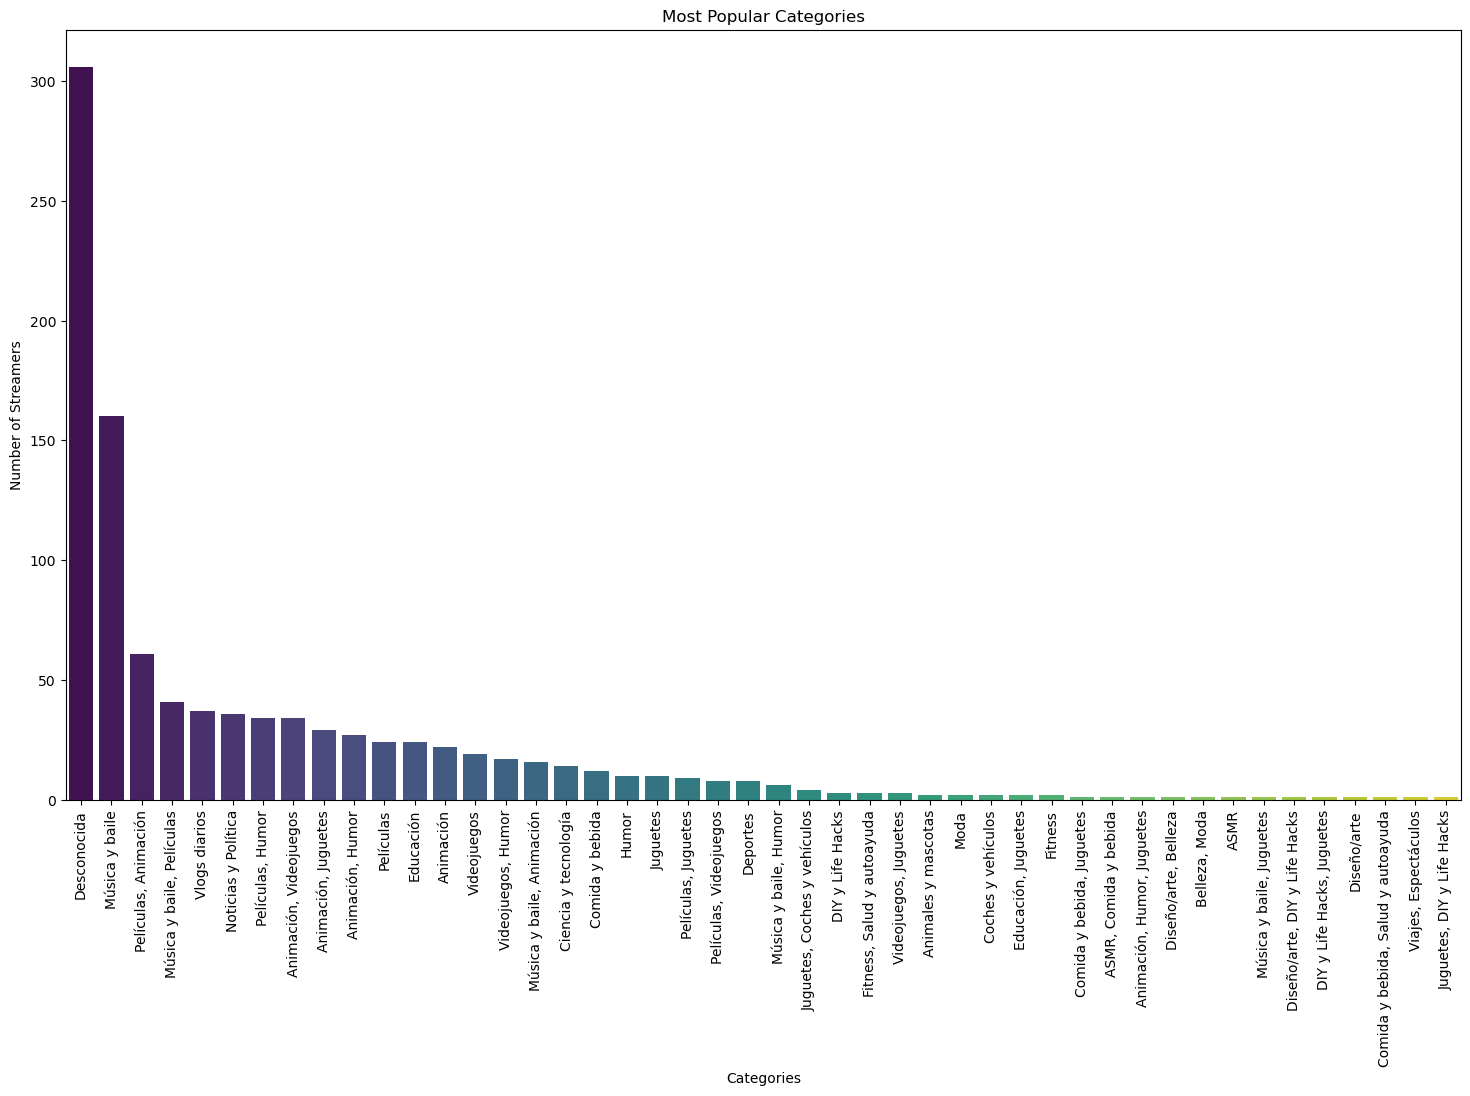

In [152]:
# Graphical representation of most popular categories
plt.figure(figsize=(18,10))
sns.barplot(x=most_popular_categories.index, y=most_popular_categories.values, palette='viridis')
plt.title('Most Popular Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation = 90)
plt.show()

#### Correlation between Subsribers and the number of Likes/Comments

In [153]:
# Subscribers vs Likes
subscribers_likes_corr = df['Subscribers'].corr(df['Likes'])
print('Correlation between Subscribers and Likes:', subscribers_likes_corr)

#Subscribers vs Comments
subscribers_comments_corr = df['Subscribers'].corr(df['Comments'])
print('Correlation between Subscribers and Comments:', subscribers_comments_corr)

Correlation between Subscribers and Likes: 0.21163868368008348
Correlation between Subscribers and Comments: 0.03634982616105394


##### Subscribers vs. Likes: The correlation coefficient is approximately 0.2116, indicating a weak positive correlation.

##### Subscribers vs. Comments: The correlation coefficient is approximately 0.0363, indicating a very weak positive correlation.

### 3) Audience Study

In [154]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: count, dtype: int64


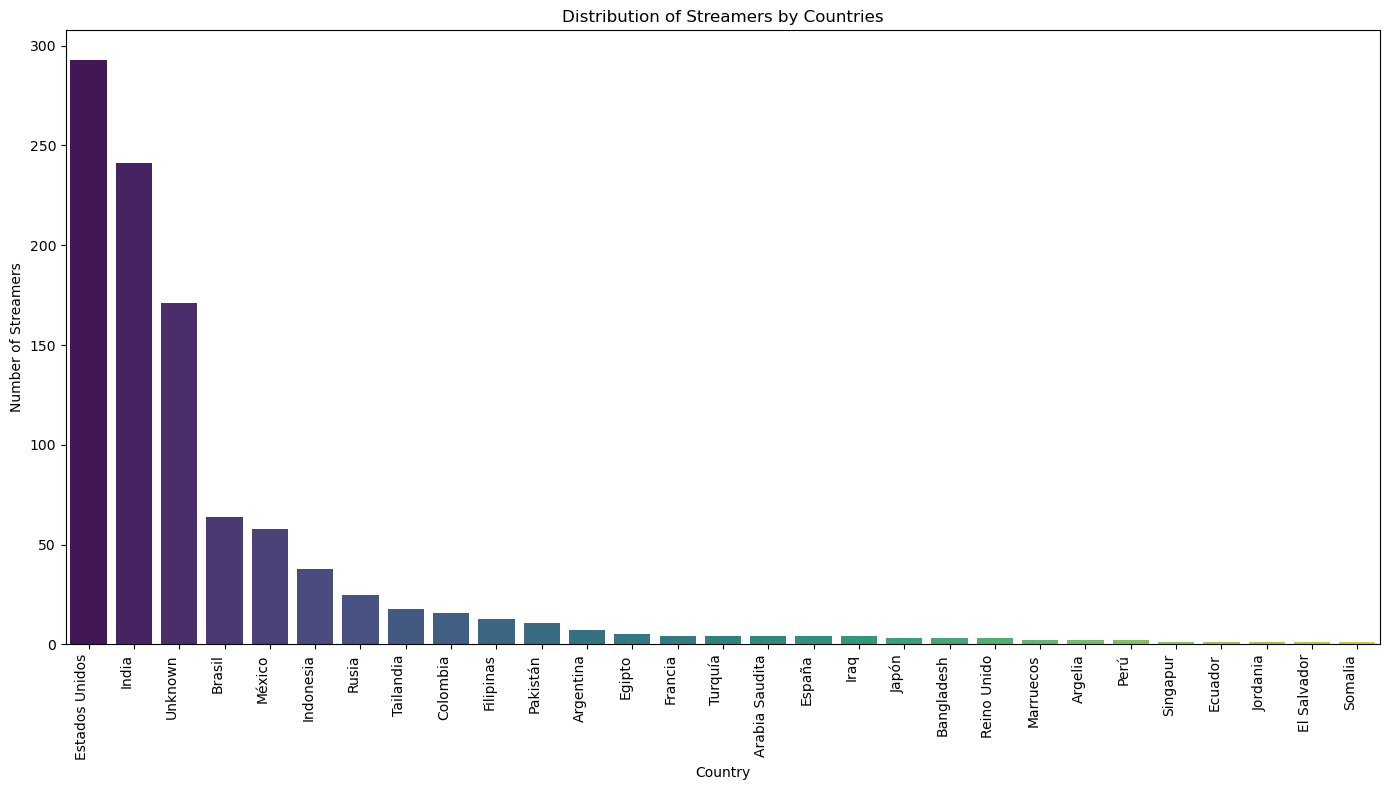

In [155]:
# Calculate the total count per country and sort in descending order
country_order = df['Country'].value_counts().index
# Geographical distribution
plt.figure(figsize=(14, 8))
sns.countplot(x='Country', data=df, order=country_order, palette='viridis')
plt.title('Distribution of Streamers by Countries')
plt.ylabel('Number of Streamers')
plt.xlabel('Country')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

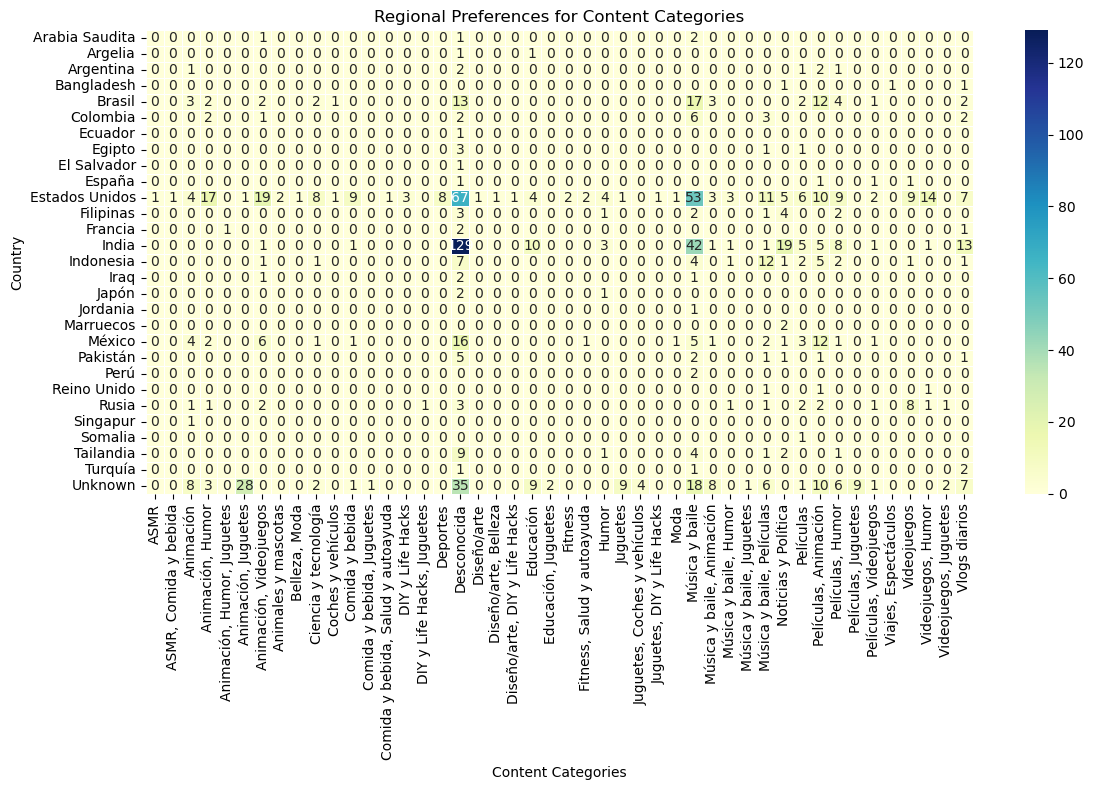

In [156]:
# Create a pivot table to count the number of streamers in each country-category combination
pivot_table = df.pivot_table(index='Country', columns='Categories', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 4) Performance Metrics

#### Average number of subsribers, visits, likes, and comments

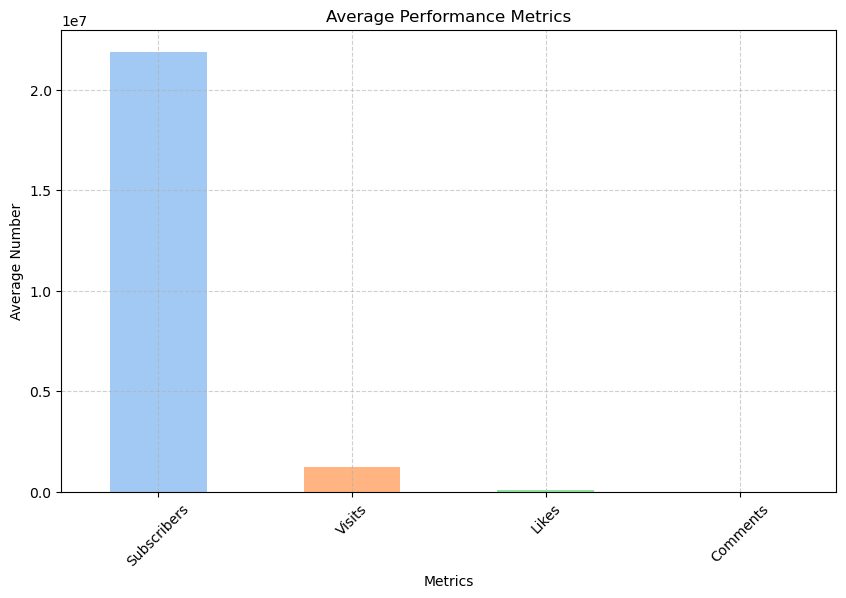

In [157]:
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
colors = sns.color_palette("pastel", 5)
plt.figure(figsize=(10, 6), facecolor='white')
average_metrics.plot(kind='bar', color=colors)
plt.title('Average Performance Metrics')
plt.ylabel('Average Number')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

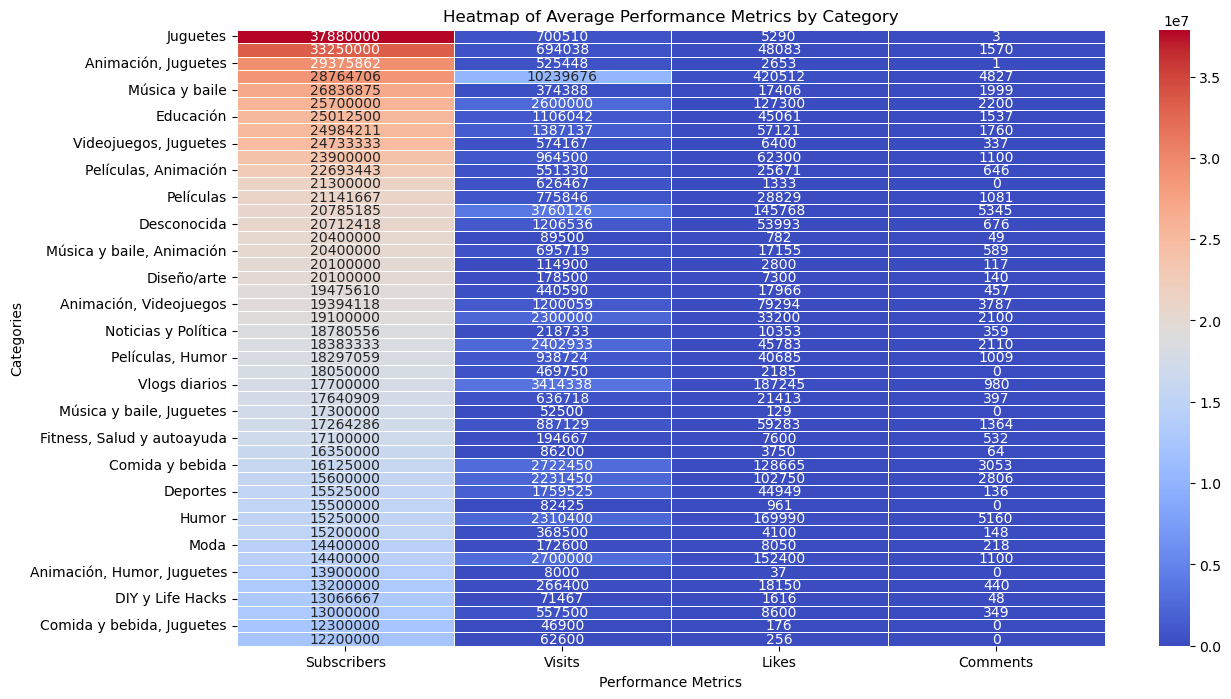

In [160]:
# Patterns and anomalies
category_metrics = df.groupby('Categories')[['Subscribers', 'Visits', 'Likes', 'Comments']].mean().sort_values(
    by='Subscribers', ascending=False)

plt.figure(figsize=(14, 8), facecolor='white')
sns.heatmap(category_metrics, annot=True, fmt='.0f', cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Average Performance Metrics by Category')
plt.ylabel('Categories')
plt.xlabel('Performance Metrics')
plt.show()

### 5) Content Categories

#### Distriution of content categories

Categories
Desconocida                           306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

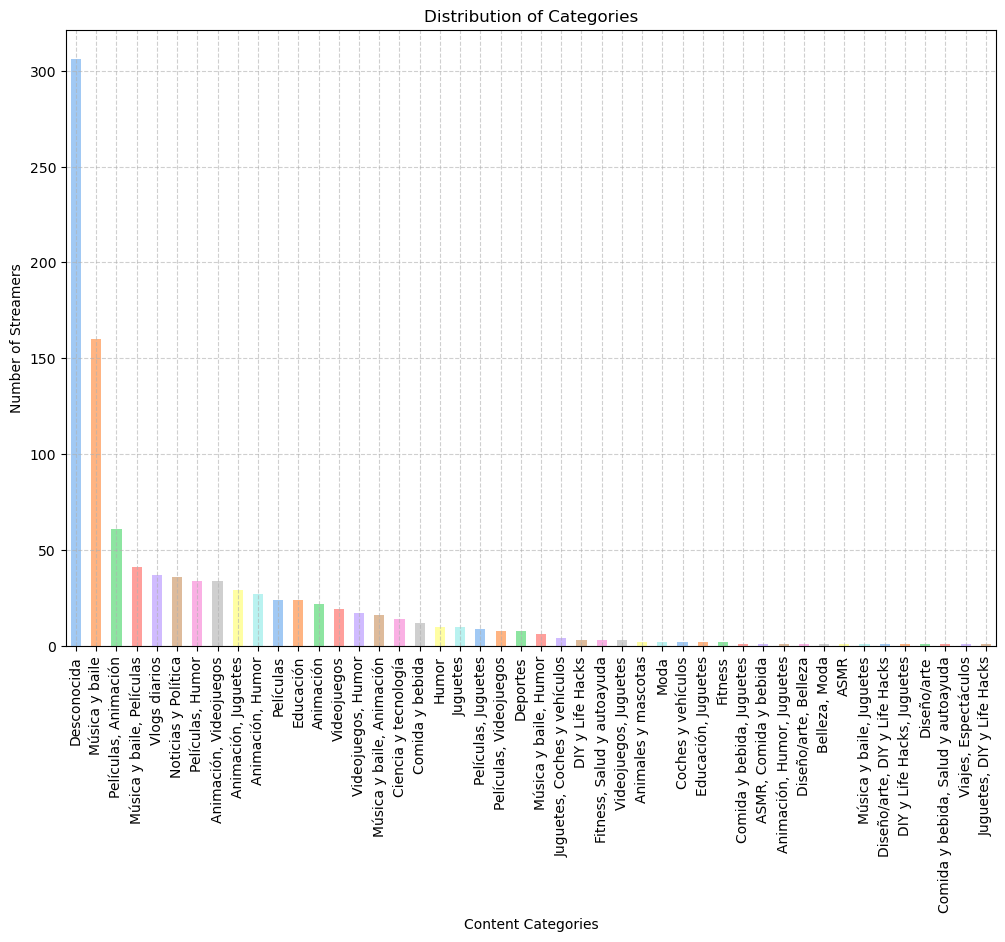

In [161]:
category_counts = df['Categories'].value_counts()
print(category_counts)

#Plotting
colors = sns.color_palette("pastel")

plt.figure(figsize=(12, 8), facecolor='white')
category_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Categories')
plt.ylabel('Number of Streamers')
plt.xlabel('Content Categories')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Categories
Desconocida                  306
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Name: count, dtype: int64


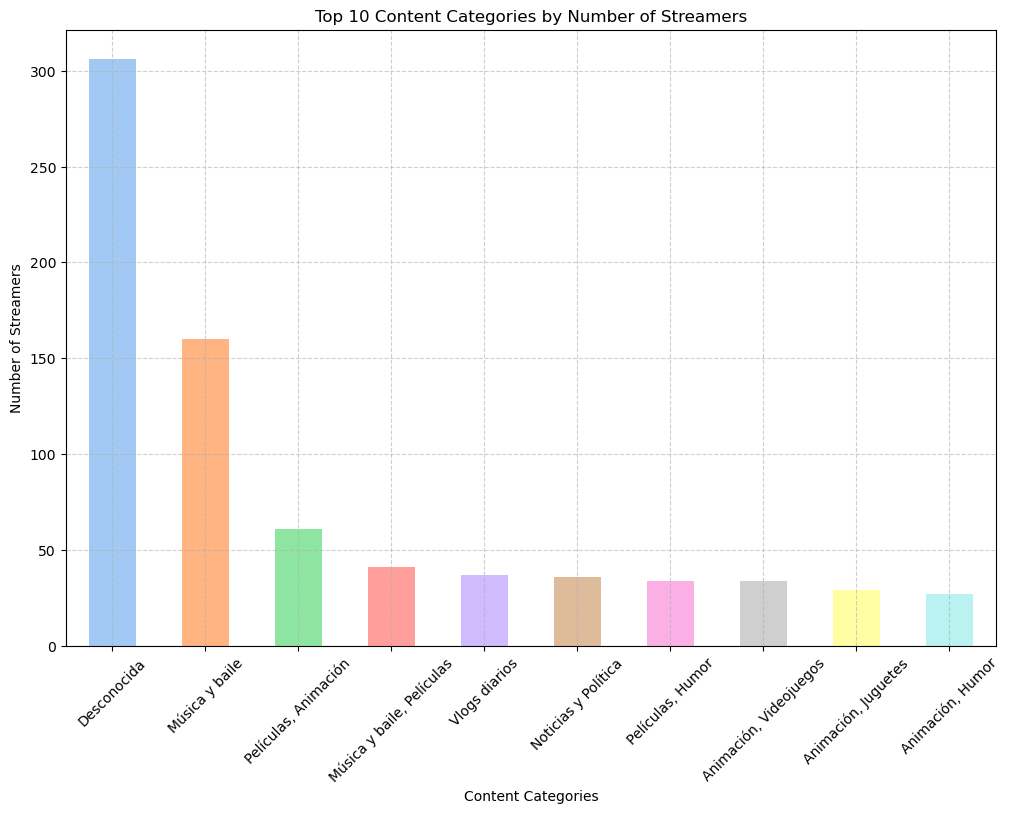

In [162]:
# Top 10 Categories
category_counts = df['Categories'].value_counts()
print(category_counts.head(10))

colors = sns.color_palette("pastel")

plt.figure(figsize=(12, 8), facecolor='white')
category_counts.head(10).plot(kind='bar', color=colors)
plt.title('Top 10 Content Categories by Number of Streamers')
plt.ylabel('Number of Streamers')
plt.xlabel('Content Categories')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Categories with exception performance metrics

In [163]:
# Group by 'Categories' and aggregate the metrics
category_metrics = df.groupby('Categories').agg({
    'Subscribers': 'sum',
    'Visits': 'sum',
    'Likes': 'sum',
    'Comments': 'sum'
}).reset_index()

# Filtering the exceptional metrics
exceptional_metrics = category_metrics[
    (category_metrics['Subscribers'] > category_metrics['Subscribers'].quantile(0.75)) & 
    (category_metrics['Visits'] > category_metrics['Visits'].quantile(0.75)) & 
    (category_metrics['Likes'] > category_metrics['Likes'].quantile(0.75)) & 
    (category_metrics['Comments'] > category_metrics['Comments'].quantile(0.75))
]

# Print the exceptional metrics
print(exceptional_metrics)

                Categories   Subscribers       Visits       Likes  Comments
3         Animación, Humor  5.612000e+08  101523400.0   3935745.0  144314.0
6   Animación, Videojuegos  6.594000e+08   40802000.0   2695997.0  128745.0
17             Desconocida  6.338000e+09  369199915.5  16521915.0  206965.0
21               Educación  6.003000e+08   26545000.0   1081458.0   36894.0
30          Música y baile  4.293900e+09   59902100.0   2784909.0  319829.0
37    Películas, Animación  1.384300e+09   33631100.0   1565932.0   39385.0
38        Películas, Humor  6.221000e+08   31916600.0   1383277.0   34299.0
45           Vlogs diarios  6.549000e+08  126330500.0   6928063.0   36275.0


### 6) Brand and Collaborations

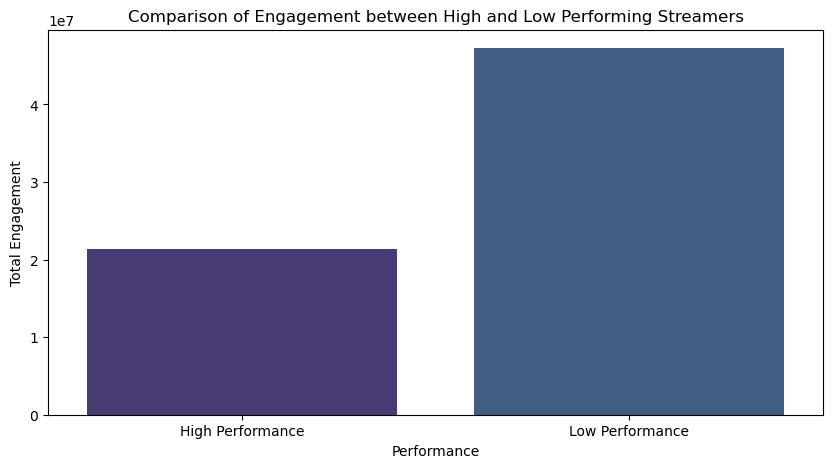

In [164]:
# Define thresholds for high anmd loe performance based on quartiles
high_subscribers = df['Subscribers'].quantile(0.75, interpolation = 'nearest')
high_likes = df['Likes'].quantile(0.75, interpolation = 'nearest')
high_comments = df['Comments'].quantile(0.75, interpolation = 'nearest')

low_subscribers = df['Subscribers'].quantile(0.25, interpolation = 'nearest')
low_likes = df['Likes'].quantile(0.25, interpolation = 'nearest')
low_comments = df['Comments'].quantile(0.25, interpolation = 'nearest')

#High Performance and Low Performance
df['HighPerformance'] = ((df['Subscribers'] >= high_subscribers) & (df['Likes'] >= high_likes) & (df['Comments'] >= high_comments))
df['LowPerformance'] = ((df['Subscribers'] >= low_subscribers) & (df['Likes'] >= low_likes) & (df['Comments'] >= low_comments))

# Engagement based on likes and comments
df['Engagement'] = df['Likes'] + df['Comments']
high_performance = df[df['HighPerformance']]['Engagement'].sum()
low_performance = df[df['LowPerformance']]['Engagement'].sum()

#barplot of High Performance and Low Performance
plt.figure(figsize=(10,5))
sns.barplot(x=['High Performance', 'Low Performance'], y = [high_performance,low_performance])
plt.title('Comparison of Engagement between High and Low Performing Streamers')
plt.xlabel('Performance')
plt.ylabel('Total Engagement')
plt.show()

In [165]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,HighPerformance,LowPerformance,Engagement
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,False,True,2778.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,True,5318500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,False,False,24700.0
3,4,SETIndia,Desconocida,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,False,False,175.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,False,False,12400.0


In [166]:
# Remove 'Links' column from the dataset
df.drop(columns=["Links"], inplace=True)
print(df.head())

   Rank       Username           Categories  Subscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia          Desconocida  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  HighPerformance  LowPerformance  \
0      86200.0     2700.0      78.0            False            True   
1  117400000.0  5300000.0   18500.0             True            True   
2    7000000.0    24700.0       0.0            False           False   
3      15600.0      166.0       9.0            False           False   
4    3900000.0    12400.0       0.0            False           False   

   Engagement  
0      2778.0  
1   5318500.0  
2     24700.0  
3       175.0  
4     12400.0  


### 7) Benchmarking

#### Streamers with above average metrics in terms of subscribers, visits, likes and comments

In [167]:
above_average = df[(df['Subscribers'] > df['Subscribers'].mean()) & (df['Visits'] > df['Visits'].mean()) & (
            df['Likes'] > df['Likes'].mean()) & (df['Comments'] > df['Comments'].mean())]
print(above_average[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']])



                  Username  Subscribers       Visits      Likes  Comments
1                  MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5                PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26             dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39             JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
64         luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96          TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   16500.0
100             markiplier   35500000.

#### Top performing content creators

In [168]:
df['Total_Engagement'] = df['Subscribers'] + df['Visits'] + df['Likes'] + df['Comments']
top_performers = df.nlargest(5, 'Total_Engagement')[
    ['Username', 'Subscribers', 'Visits', 'Likes', 'Comments', 'Total_Engagement']]
print('\n The top performers are: ', '\n', top_performers)



 The top performers are:  
       Username  Subscribers       Visits      Likes  Comments  \
1      MrBeast  183500000.0  117400000.0  5300000.0   18500.0   
0      tseries  249500000.0      86200.0     2700.0      78.0   
2    CoComelon  165500000.0    7000000.0    24700.0       0.0   
3     SETIndia  162600000.0      15600.0      166.0       9.0   
136   MrBeast2   31300000.0   83100000.0  5000000.0   11600.0   

     Total_Engagement  
1         306218500.0  
0         249588978.0  
2         172524700.0  
3         162615775.0  
136       119411600.0  


<Figure size 1400x800 with 0 Axes>

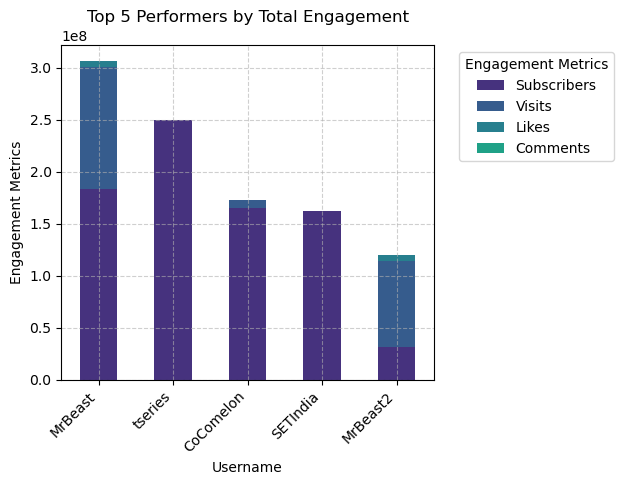

In [169]:
# Visualization
plt.figure(figsize=(14, 8), facecolor='white')
top_performers.set_index('Username')[['Subscribers', 'Visits', 'Likes', 'Comments']].plot(kind='bar', stacked=True)
plt.title('Top 5 Performers by Total Engagement')
plt.xlabel('Username')
plt.ylabel('Engagement Metrics')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Engagement Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 8) Content Recommendations

In [170]:
# Creating the user-item matrix based on Subscribers in different content categories
user_item_matrix = df.pivot_table(index='Username', columns='Categories', values='Subscribers', fill_value=0)

# Normalize the user-item matrix
normalized_matrix = user_item_matrix.div(np.linalg.norm(user_item_matrix, axis=1), axis=0)


In [171]:
# Calculate cosine similarity using matrix multiplication
cosine_sim = normalized_matrix @ normalized_matrix.T

def get_recommendations(username, cosine_sim=cosine_sim):
    sim_scores = cosine_sim.loc[username].sort_values(ascending=False)
    sim_scores = sim_scores.iloc[1:16] # Considering top 15 similar streamers
    return sim_scores.index

recommend_streamers = get_recommendations('tseries')
recommend_streamers

Index(['marshmello', 'Enterr10Rangeela', 'postmalone', 'popchartbusters',
       'adityamusic', 'Pitbull', 'anitta', 'officialjassrecords',
       'awakeningrecords', 'nickiminaj', 'nianaguerrero', 'GMMGrammy',
       'GaaneSuneAnsune', 'PTXofficial', 'netdmuzik'],
      dtype='object', name='Username')